In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler

In [2]:
df=pd.read_excel('enhanced_iot_smart_irrigation_data.xlsx',index_col=0,na_values=["??","????"])

In [3]:
df.head()

,SoilMoisture,SoilTemperature,AirTemperature,Humidity,pH,WaterUsage,CropType,IrrigationSystemID,ReadingTimestamp,SolarRadiation,WindSpeed
FieldID,,,,,,,,,,,
1,75.497470,48.925443,65.755233,71.546882,6.033532,1271.276971,Wheat,977,2023-01-01 00:00:00,749.424232,12.986049
2,43.964037,31.746846,42.466567,39.497065,5.708924,725.819930,Other,435,2023-01-01 01:00:00,480.541085,10.227050
3,16.153563,16.320886,24.179632,50.153228,7.012193,518.045654,Corn,929,2023-01-01 02:00:00,284.859325,7.806262
4,66.240113,49.510807,65.823457,77.174326,6.813488,1163.743994,Wheat,375,2023-01-01 03:00:00,692.485906,11.424201
5,59.911154,36.991358,49.457836,79.649614,7.445098,1116.273164,Other,614,2023-01-01 04:00:00,558.182852,12.941625


In [4]:
df.tail()

,SoilMoisture,SoilTemperature,AirTemperature,Humidity,pH,WaterUsage,CropType,IrrigationSystemID,ReadingTimestamp,SolarRadiation,WindSpeed
FieldID,,,,,,,,,,,
9996,21.301514,12.605141,21.303921,31.947493,7.509892,495.127997,Wheat,956,2024-02-21 11:00:00,248.589000,9.575284
9997,32.462397,25.544738,35.887922,40.515515,7.641782,643.519452,Wheat,918,2024-02-21 12:00:00,394.700169,9.602570
9998,38.218953,27.653245,36.687951,39.342030,7.122996,645.280473,Corn,852,2024-02-21 13:00:00,418.912590,10.128246
9999,22.648481,19.744687,31.193732,53.538394,7.976790,660.944974,Soybean,355,2024-02-21 14:00:00,351.726566,11.063472
10000,27.485332,28.672564,37.627770,56.517245,5.819209,661.789378,Wheat,395,2024-02-21 15:00:00,403.356418,11.055635


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SoilMoisture        10000 non-null  float64       
 1   SoilTemperature     10000 non-null  float64       
 2   AirTemperature      10000 non-null  float64       
 3   Humidity            10000 non-null  float64       
 4   pH                  10000 non-null  float64       
 5   WaterUsage          10000 non-null  float64       
 6   CropType            10000 non-null  object        
 7   IrrigationSystemID  10000 non-null  int64         
 8   ReadingTimestamp    10000 non-null  datetime64[ns]
 9   SolarRadiation      10000 non-null  float64       
 10  WindSpeed           10000 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 937.5+ KB


In [6]:
df.describe()

,SoilMoisture,SoilTemperature,AirTemperature,Humidity,pH,WaterUsage,IrrigationSystemID,ReadingTimestamp,SolarRadiation,WindSpeed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000
mean,45.107805,32.508253,44.016120,55.262556,6.500107,827.893112,550.379000,2023-07-28 07:30:00,489.836540,10.542592
min,10.003915,-0.934573,4.372139,-0.140601,5.000062,206.449578,100.000000,2023-01-01 00:00:00,89.428092,0.468333
25%,27.727109,23.766116,33.616312,45.065086,5.756877,613.926380,327.000000,2023-04-15 03:45:00,384.822077,8.888100
50%,45.165558,32.531021,43.979118,55.396310,6.487205,829.858637,546.000000,2023-07-28 07:30:00,488.791955,10.531866
75%,62.612741,41.350229,54.740259,65.645966,7.243624,1040.525528,773.000000,2023-11-09 11:15:00,597.335350,12.229202
max,79.996159,64.925464,84.095603,104.304369,7.999901,1466.469616,999.000000,2024-02-21 15:00:00,906.990364,19.795071
std,20.178208,11.206733,13.590616,14.685234,0.861459,261.046217,259.553263,NaN,137.098705,2.469727


In [7]:
df.shape

(10000, 11)

In [8]:
df.isnull().sum()

SoilMoisture          0
SoilTemperature       0
AirTemperature        0
Humidity              0
pH                    0
WaterUsage            0
CropType              0
IrrigationSystemID    0
ReadingTimestamp      0
SolarRadiation        0
WindSpeed             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

SoilMoisture                 float64
SoilTemperature              float64
AirTemperature               float64
Humidity                     float64
pH                           float64
WaterUsage                   float64
CropType                      object
IrrigationSystemID             int64
ReadingTimestamp      datetime64[ns]
SolarRadiation               float64
WindSpeed                    float64
dtype: object

In [11]:
df['CropType'].unique()

array(['Wheat', 'Other', 'Corn', 'Soybean'], dtype=object)

In [12]:

from mlintern010 import Scaler, EDA
final_df= Scaler.Normalization(df)

final_df['CropType'] = final_df['CropType'].map({
    'Corn':1,
    'Soybean':2,
    'Other':5,
    'Rice':3,
    'Wheat':4
})

Normalization ...


In [13]:
final_df

,SoilMoisture,SoilTemperature,AirTemperature,Humidity,pH,WaterUsage,CropType,IrrigationSystemID,ReadingTimestamp,SolarRadiation,WindSpeed
FieldID,,,,,,,,,,,
1,0.935726,0.757060,0.769950,0.686366,0.344509,0.845088,4,0.975528,2023-01-01 00:00:00,0.807273,0.647689
2,0.485198,0.496225,0.477832,0.379508,0.236300,0.412192,5,0.372636,2023-01-01 01:00:00,0.478389,0.504933
3,0.087862,0.262002,0.248452,0.481534,0.670746,0.247295,1,0.922136,2023-01-01 02:00:00,0.239041,0.379678
4,0.803463,0.765948,0.770806,0.740246,0.604508,0.759745,4,0.305895,2023-01-01 03:00:00,0.737629,0.566876
5,0.713040,0.575857,0.565526,0.763945,0.815056,0.722071,5,0.571746,2023-01-01 04:00:00,0.573357,0.645390
...,...,...,...,...,...,...,...,...,...,...,...
9996,0.161412,0.205583,0.212381,0.307225,0.836655,0.229106,4,0.952169,2024-02-21 11:00:00,0.194677,0.471210
9997,0.320871,0.402054,0.395314,0.389259,0.880621,0.346875,4,0.909900,2024-02-21 12:00:00,0.373393,0.472622
9998,0.403117,0.434069,0.405349,0.378023,0.707683,0.348273,1,0.836485,2024-02-21 13:00:00,0.403008,0.499821


In [14]:
final_df.corr()

,SoilMoisture,SoilTemperature,AirTemperature,Humidity,pH,WaterUsage,CropType,IrrigationSystemID,ReadingTimestamp,SolarRadiation,WindSpeed
SoilMoisture,1.000000,0.896766,0.887297,0.651221,-0.012303,0.957196,0.007545,0.016784,0.001970,0.877803,0.380191
SoilTemperature,0.896766,1.000000,0.989012,0.731250,-0.005022,0.900339,0.003431,0.015878,0.003495,0.978165,0.431248
AirTemperature,0.887297,0.989012,1.000000,0.738438,-0.004076,0.895536,0.004646,0.015248,0.002608,0.989112,0.434304
Humidity,0.651221,0.731250,0.738438,1.000000,-0.004476,0.786590,-0.011264,0.014452,0.005300,0.731793,0.588907
pH,-0.012303,-0.005022,-0.004076,-0.004476,1.000000,-0.009364,-0.007531,0.005013,0.000679,-0.005163,0.004173
WaterUsage,0.957196,0.900339,0.895536,0.786590,-0.009364,1.000000,0.000094,0.018465,0.005336,0.886117,0.461905
CropType,0.007545,0.003431,0.004646,-0.011264,-0.007531,0.000094,1.000000,-0.004382,-0.019689,0.002548,-0.005108
IrrigationSystemID,0.016784,0.015878,0.015248,0.014452,0.005013,0.018465,-0.004382,1.000000,-0.003128,0.016934,0.019007
ReadingTimestamp,0.001970,0.003495,0.002608,0.005300,0.000679,0.005336,-0.019689,-0.003128,1.000000,-0.000637,0.019206
SolarRadiation,0.877803,0.978165,0.989112,0.731793,-0.005163,0.886117,0.002548,0.016934,-0.000637,1.000000,0.430962


# Line Chart for Soil Moisture Over Time

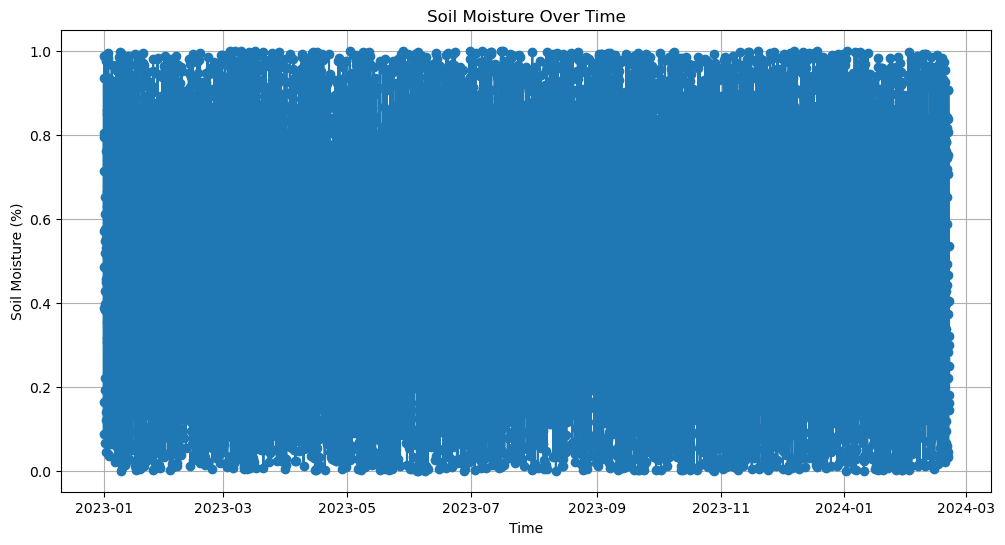

In [15]:
import matplotlib.pyplot as plt

# Convert 'ReadingTimestamp' to datetime
df['ReadingTimestamp'] = pd.to_datetime(df['ReadingTimestamp'])

# Plot Soil Moisture over time
plt.figure(figsize=(12, 6))
plt.plot(df['ReadingTimestamp'], df['SoilMoisture'], marker='o', linestyle='-')
plt.title('Soil Moisture Over Time')
plt.xlabel('Time')
plt.ylabel('Soil Moisture (%)')
plt.grid(True)
plt.show()


# Plot Scatter Plot for Soil Moisture vs. Water Usage

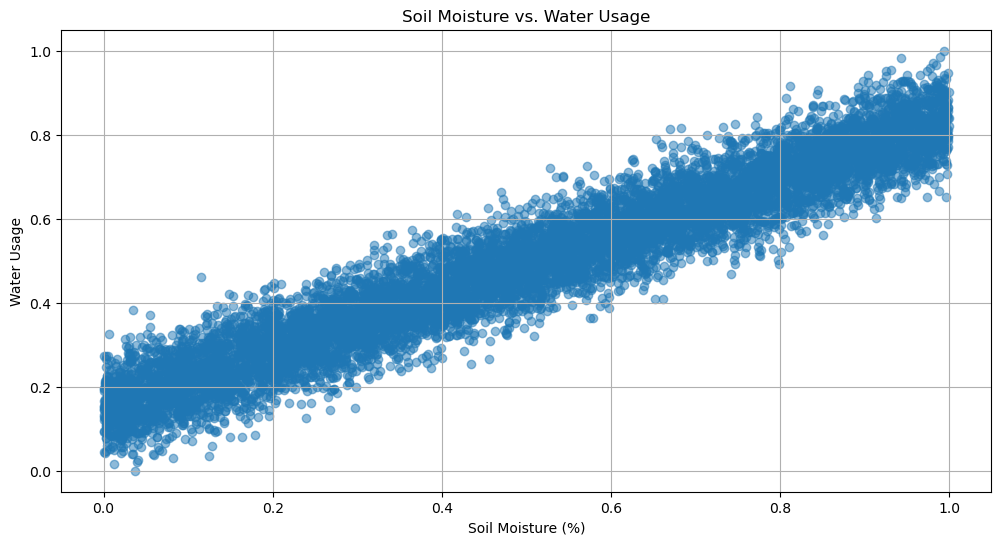

In [16]:

plt.figure(figsize=(12, 6))
plt.scatter(df['SoilMoisture'], df['WaterUsage'], alpha=0.5)
plt.title('Soil Moisture vs. Water Usage')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Water Usage')
plt.grid(True)
plt.show()


# Plot 2: Air Temperature Over Time


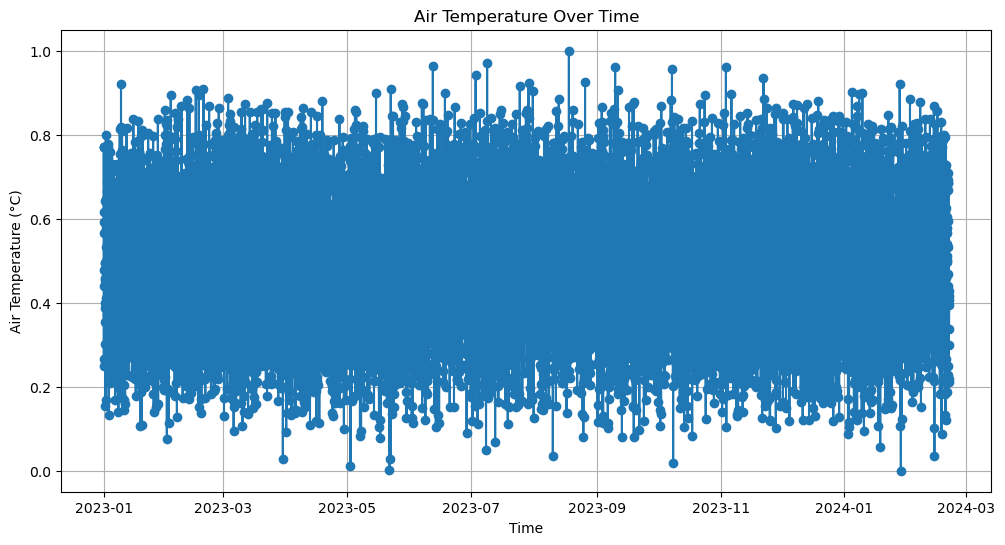

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['ReadingTimestamp'], df['AirTemperature'], marker='o', linestyle='-')
plt.title('Air Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')
plt.grid(True)
plt.show()


In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SoilMoisture        10000 non-null  float64       
 1   SoilTemperature     10000 non-null  float64       
 2   AirTemperature      10000 non-null  float64       
 3   Humidity            10000 non-null  float64       
 4   pH                  10000 non-null  float64       
 5   WaterUsage          10000 non-null  float64       
 6   CropType            10000 non-null  int64         
 7   IrrigationSystemID  10000 non-null  float64       
 8   ReadingTimestamp    10000 non-null  datetime64[ns]
 9   SolarRadiation      10000 non-null  float64       
 10  WindSpeed           10000 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 937.5 KB


In [39]:
X = final_df.drop(['WaterUsage','ReadingTimestamp','IrrigationSystemID'],axis=1)
y = final_df['WaterUsage']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.20, random_state=5)

### SVM

In [42]:
from sklearn import svm
svr = svm.SVR()

In [43]:
svr.fit(xtrain,ytrain)

SVR()

In [44]:
pred1 = svr.predict(xtest)

In [45]:

acc1 = r2_score(ytest, pred1)
acc1

0.9608237599343442

In [66]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(ytest, pred1, squared=False)
rms

0.04128152685561899

In [70]:
MSE = np.square(np.subtract(ytest,pred1)).mean() 
MSE

0.0017041644595311922

### LINEAR

In [46]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [47]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [48]:
pred = reg.predict(xtest)

In [49]:
from sklearn.metrics import r2_score

In [50]:
acc = r2_score(ytest, pred)
acc

0.9634847571285831

In [67]:
rms = mean_squared_error(ytest, pred, squared=False)
rms

0.03985487694494449

In [71]:
MSE = np.square(np.subtract(ytest,pred)).mean() 
MSE

0.001588411216296668

### DESICION TREE

In [51]:
from sklearn import tree

In [52]:
clf = tree.DecisionTreeRegressor()
clf=clf.fit(xtrain,ytrain)

In [53]:
pread2=clf.predict(xtest)

In [54]:
acc2 = r2_score(ytest, pread2)
acc2


0.9273746649264345

In [72]:
rms = mean_squared_error(ytest, pread2, squared=False)
rms

0.056206746916995606

In [73]:
MSE = np.square(np.subtract(ytest,pread2)).mean() 
MSE

0.003159198398991195

### RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestRegressor
ram=RandomForestRegressor()
ram=ram.fit(xtrain,ytrain)

In [61]:
pread3=ram.predict(xtest)

In [62]:
acc3= r2_score(ytest, pread3)
acc3


0.9592745135733542

In [63]:
MSE = np.square(np.subtract(ytest,pread3)).mean() 

In [64]:
MSE 

0.0017715565978025651

In [74]:
rms = mean_squared_error(ytest, pread3, squared=False)
rms

0.04208986336165235

In [77]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(xtrain,ytrain)
pred = reg.predict(xtest)
from sklearn.metrics import r2_score
acc = r2_score(ytest, pred)
print ('acc is:',acc)
rms = mean_squared_error(ytest, pred, squared=False)
print("rmse is:",rms)
MSE = np.square(np.subtract(ytest,pred)).mean() 
print("mse is",MSE)

acc is: 0.9634847571285831
rmse is: 0.03985487694494449
mse is 0.001588411216296668


In [79]:
# Save the model
from joblib import dump, load  # Importing joblib for saving and loading models
model_file = 'Linear_regression_model.joblib'
dump(reg, model_file)
print(f"Model saved as {model_file}")

Model saved as Linear_regression_model.joblib


In [83]:
df

,SoilMoisture,SoilTemperature,AirTemperature,Humidity,pH,WaterUsage,CropType,IrrigationSystemID,ReadingTimestamp,SolarRadiation,WindSpeed
FieldID,,,,,,,,,,,
1,0.935726,0.757060,0.769950,0.686366,0.344509,0.845088,4,0.975528,2023-01-01 00:00:00,0.807273,0.647689
2,0.485198,0.496225,0.477832,0.379508,0.236300,0.412192,5,0.372636,2023-01-01 01:00:00,0.478389,0.504933
3,0.087862,0.262002,0.248452,0.481534,0.670746,0.247295,1,0.922136,2023-01-01 02:00:00,0.239041,0.379678
4,0.803463,0.765948,0.770806,0.740246,0.604508,0.759745,4,0.305895,2023-01-01 03:00:00,0.737629,0.566876
5,0.713040,0.575857,0.565526,0.763945,0.815056,0.722071,5,0.571746,2023-01-01 04:00:00,0.573357,0.645390
...,...,...,...,...,...,...,...,...,...,...,...
9996,0.161412,0.205583,0.212381,0.307225,0.836655,0.229106,4,0.952169,2024-02-21 11:00:00,0.194677,0.471210
9997,0.320871,0.402054,0.395314,0.389259,0.880621,0.346875,4,0.909900,2024-02-21 12:00:00,0.373393,0.472622
9998,0.403117,0.434069,0.405349,0.378023,0.707683,0.348273,1,0.836485,2024-02-21 13:00:00,0.403008,0.499821
